In [31]:
import sys
import pickle as pkl
from collections import OrderedDict

from embedMatrix import MatrixEst
from chemprop.models import MPN
from chemprop.parsing import parse_train_args

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim

# Train GCN

In [7]:
sys.argv = ['train.py', '--data_path', 'tmp.csv', '--dataset_type', 'classification', '--num_folds', '10', '--metric', 'prc-auc', '--embed_dir', 'tmp.lol']

In [8]:
args = parse_train_args()
vars(args)

Using GPU False None


{'gpu': None,
 'data_path': 'tmp.csv',
 'use_compound_names': False,
 'max_data_size': None,
 'test': False,
 'features_only': False,
 'features_generator': None,
 'features_path': None,
 'save_dir': '/var/folders/7c/8ljs73ts2m1gwpnddwdnyw600000gn/T/tmpgixbx5e6',
 'save_smiles_splits': False,
 'checkpoint_dir': None,
 'checkpoint_path': None,
 'dataset_type': 'classification',
 'multiclass_num_classes': 3,
 'separate_val_path': None,
 'separate_val_features_path': None,
 'separate_test_path': None,
 'separate_test_features_path': None,
 'split_type': 'random',
 'split_sizes': [0.8, 0.1, 0.1],
 'num_folds': 10,
 'folds_file': None,
 'val_fold_index': None,
 'test_fold_index': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'seed': 0,
 'metric': 'prc-auc',
 'quiet': False,
 'log_frequency': 10,
 'show_individual_scores': False,
 'no_cache': False,
 'config_path': None,
 'epochs': 30,
 'batch_size': 50,
 'warmup_epochs': 2.0,
 'init_lr': 0.0001,
 'max_lr': 0.001,
 'final

In [47]:
gcn = MPN(args, 133, 147, False)
gcn

MPN(
  (encoder): MPNEncoder(
    (dropout_layer): Dropout(p=0.0, inplace=False)
    (act_func): ReLU()
    (W_i): Linear(in_features=147, out_features=300, bias=False)
    (W_h): Linear(in_features=300, out_features=300, bias=False)
    (W_o): Linear(in_features=433, out_features=300, bias=True)
  )
)

In [43]:
gcn.state_dict()

OrderedDict([('encoder.cached_zero_vector',
              tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            

In [19]:
import pandas as pd
data = pd.read_csv('../scripts/agg.csv')
data.head()

,drugSMILE,exSMILE,agg
0,CNC(=O)C1=NC=CC(OC2=CC=C(NC(=O)NC3=CC(=C(Cl)C=...,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,0
1,CNC(=O)C1=NC=CC(OC2=CC=C(NC(=O)NC3=CC(=C(Cl)C=...,C(CC(=O)O)C(=O)O,0
2,CNC(=O)C1=NC=CC(OC2=CC=C(NC(=O)NC3=CC(=C(Cl)C=...,CCCCCCCCOC(=O)C1=CC(=C(C(=C1)O)O)O,0
3,CNC(=O)C1=NC=CC(OC2=CC=C(NC(=O)NC3=CC(=C(Cl)C=...,C(C(C(=O)O)O)C(=O)O,0
4,CNC(=O)C1=NC=CC(OC2=CC=C(NC(=O)NC3=CC(=C(Cl)C=...,C(CCC(=O)O)CC(=O)O,0


In [25]:
ls aggModels_dim300_batch5k/

embedMap.pkl  fold_2.pt     fold_5.pt     fold_8.pt
fold_0.pt     fold_3.pt     fold_6.pt     fold_9.pt
fold_1.pt     fold_4.pt     fold_7.pt     res.txt


In [33]:
EMBED_PATH = 'aggModels_dim300_batch5k/'

In [252]:
lol = torch.load(EMBED_PATH + 'fold_1.pt')
lol['drug.weight']

tensor([[-0.1871,  0.2981, -0.0076,  ..., -0.1496, -0.1848,  0.1024],
        [-0.2197,  0.1945,  0.0362,  ..., -0.0053, -0.2117,  0.1911],
        [-0.2036,  0.2378, -0.2169,  ..., -0.3162, -0.1227,  0.2198],
        ...,
        [-0.1322, -0.0771,  0.0554,  ..., -0.0064, -0.1151,  0.0752],
        [-0.2370,  0.0583, -0.2200,  ..., -0.2609, -0.1899,  0.1774],
        [-0.2100,  0.1816, -0.2785,  ..., -0.1153, -0.1439,  0.2344]])

In [253]:
embed = MatrixEst(len(set(data['drugSMILE'])), len(set(data['exSMILE'])))
embed

MatrixEst(
  (drug): Embedding(16, 300)
  (cmpd): Embedding(89, 300)
  (ffn): Sequential(
    (0): Linear(in_features=600, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=1, bias=True)
  )
)

In [254]:
embed.load_state_dict(torch.load(EMBED_PATH + 'fold_1.pt'))

<All keys matched successfully>

In [255]:
embed.state_dict()

OrderedDict([('drug.weight',
              tensor([[-0.1871,  0.2981, -0.0076,  ..., -0.1496, -0.1848,  0.1024],
                      [-0.2197,  0.1945,  0.0362,  ..., -0.0053, -0.2117,  0.1911],
                      [-0.2036,  0.2378, -0.2169,  ..., -0.3162, -0.1227,  0.2198],
                      ...,
                      [-0.1322, -0.0771,  0.0554,  ..., -0.0064, -0.1151,  0.0752],
                      [-0.2370,  0.0583, -0.2200,  ..., -0.2609, -0.1899,  0.1774],
                      [-0.2100,  0.1816, -0.2785,  ..., -0.1153, -0.1439,  0.2344]])),
             ('cmpd.weight',
              tensor([[ 0.1954, -0.1698,  0.1672,  ...,  0.1630,  0.1966, -0.2066],
                      [ 0.2026, -0.1777,  0.1953,  ...,  0.1818,  0.2041, -0.1944],
                      [ 0.1195, -0.0530,  0.0114,  ...,  0.0350,  0.1522, -0.1879],
                      ...,
                      [ 0.2065, -0.1401,  0.2001,  ...,  0.1594,  0.2076, -0.2051],
                      [ 0.1366, -0.0817, -0.1

In [256]:
with open(EMBED_PATH+'embedMap.pkl','rb') as f:
    tmp = pkl.load(f)
    drugIdx = tmp['drug']
    cmpdIdx = tmp['cmpd']
drugIdx

{'CC1=CC(=CC(C)=C1OC1=C(Br)C(N)=NC(NC2=CC=C(C=C2)C#N)=N1)C#N': 0,
 'COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(C=C2)O)OC)O': 1,
 'COC1=CC2=C(C(O)=C1)C(=O)C1=C(C=C(C)C=C1O)C2=O': 2,
 'CCCCN(CCCC)CC(O)C1=C2C(=CC(Cl)=C1)\\C(=C/C1=CC=C(Cl)C=C1)C1=C2C=CC(Cl)=C1': 3,
 'C1=CC=C(C=C1)CCCCOC2=CC=C(C=C2)C(=O)NC3=CC=CC4=C3OC(=CC4=O)C5=NNN=N5': 4,
 '[H][C@@]1(C[C@@H](C)[C@]2([H])CC(=O)[C@H](C)\\C=C(C)\\[C@@H](O)[C@@H](OC)C(=O)[C@H](C)C[C@H](C)\\C=C\\C=C\\C=C(C)\\[C@H](C[C@]3([H])CC[C@@H](C)[C@@](O)(O3)C(=O)C(=O)N3CCCC[C@@]3([H])C(=O)O2)OC)CC[C@@H](O)[C@@H](C1)OC': 5,
 '[H][C@@]12CCCC[C@]1([H])CN(C[C@@H](O)[C@H](CSC1=CC=CC=C1)NC(=O)C1=C(C)C(O)=CC=C1)[C@@H](C2)C(=O)NC(C)(C)C': 6,
 'COC1=C(OCCCN2CCOCC2)C=C2C(NC3=CC(Cl)=C(F)C=C3)=NC=NC2=C1': 7,
 'Cl.CN(C)CCCN1C2=CC=CC=C2SC2=C1C=C(Cl)C=C2': 8,
 'ClC1=CC=C(COC(CN2C=CN=C2)C2=C(Cl)C=C(Cl)C=C2)C=C1': 9,
 '[H][C@@]12CC[C@H](O)[C@@]1(C)CC[C@@]1([H])C2[C@H](CCCCCCCCCS(=O)CCCC(F)(F)C(F)(F)F)CC2=CC(O)=CC=C12': 10,
 'CC1=CC(\\C=C\\C#N)=CC(C)=C1NC1=CC=NC(NC2=C

In [257]:
embed.state_dict()['drug.weight'].shape, embed.state_dict()['cmpd.weight'].shape

(torch.Size([16, 300]), torch.Size([89, 300]))

In [258]:
rev_drugIdx = {drugIdx[key]: key for key in drugIdx}
rev_cmpdIdx = {cmpdIdx[key]: key for key in cmpdIdx}
drug_inp = [rev_drugIdx[i] for i in range(len(drugIdx))]
cmpd_inp = [rev_cmpdIdx[i] for i in range(len(cmpdIdx))]

In [259]:
gcn(drug_inp).shape

torch.Size([16, 300])

In [260]:
from chemprop.nn_utils import initialize_weights

In [261]:
gcn = MPN(args, 133, 147, False)
initialize_weights(gcn)

In [262]:
optimizer = optim.Adam(gcn.parameters(),lr=1e-3)
criterion = nn.MSELoss()
target = embed.state_dict()['drug.weight']

In [263]:
gcn.train()
for epoch in range(30):
    optimizer.zero_grad()
    output = gcn(drug_inp)
    loss = criterion(output.view(target.shape), target)
    
    loss.backward()                                                                                    
    optimizer.step()
    if epoch%2 == 0:
        print(epoch, float(loss))

0 0.19569045305252075
2 0.04990845546126366
4 0.03168989717960358
6 0.02933349274098873
8 0.028050759807229042
10 0.027328046038746834
12 0.02702445350587368
14 0.026738246902823448
16 0.02622872032225132
18 0.02584933303296566
20 0.0256013423204422
22 0.025358177721500397
24 0.025066224858164787
26 0.024886757135391235
28 0.024783562868833542


In [265]:
target.norm(dim=1), target.norm(dim=1).mean()/300

(tensor([3.2034, 3.2982, 3.4855, 3.2189, 3.5698, 3.5211, 2.8620, 3.5904, 3.4785,
         2.7794, 2.9265, 3.2162, 3.4490, 2.7352, 3.6324, 3.1991]),
 tensor(0.0109))

In [266]:
output = gcn(drug_inp)
criterion(output.view(target.shape), target)

tensor(0.0246, grad_fn=<MseLossBackward>)

In [267]:
torch.save(gcn.state_dict(), 'drug_gcn.pt')

In [268]:
gcn = MPN(args, 133, 147, False)
gcn.load_state_dict(torch.load('drug_gcn.pt'))
new_state_dict = OrderedDict()

for key, value in gcn.state_dict().items():
    new_key = 'drug_encoder.' + key
    new_state_dict[new_key] = value

torch.save(new_state_dict, 'drug_gcn.pt')

In [269]:
ls

__init__.py                           drug_gcn2.pt
__pycache__/                          embedMatrix.py
aggModels_dim300_batch5k/             embed_model.pt
antiModels_dim300_batch5k_initXavier/ extractGcn.py
cmpd_gcn.pt                           teacherForce.ipynb
drug_gcn.pt


In [270]:
torch.bmm(output.unsqueeze(1), output.unsqueeze(2)).squeeze(-1).shape

torch.Size([16, 1])

In [271]:
output.shape

torch.Size([16, 300])

In [272]:
gcn = MPN(args, 133, 147, False)
initialize_weights(gcn)

In [273]:
optimizer = optim.Adam(gcn.parameters(),lr=1e-3)
criterion = nn.MSELoss()
target = embed.state_dict()['cmpd.weight']

In [274]:
gcn.train()
for epoch in range(30):
    optimizer.zero_grad()
    output = gcn(cmpd_inp)
    loss = criterion(output.view(target.shape), target)
    
    loss.backward()                                                                                    
    optimizer.step()
    if epoch%2 == 0:
        print(epoch, float(loss))

0 0.001163952387450786
2 0.00045020149999789975
4 0.0003356217417154419
6 0.0003058636833107873
8 0.00029362595818015967
10 0.00028929097598858096
12 0.00028536334801255986
14 0.0002813430482082153
16 0.0002778048595685637
18 0.0002748671333106716
20 0.0002721398650260454
22 0.0002700091664041026
24 0.00026826727926061397
26 0.0002667026991924543
28 0.00026527446893493783


In [275]:
target.norm(dim=1)/300

tensor([0.0112, 0.0111, 0.0096, 0.0078, 0.0112, 0.0081, 0.0110, 0.0086, 0.0113,
        0.0082, 0.0112, 0.0083, 0.0114, 0.0112, 0.0091, 0.0106, 0.0083, 0.0066,
        0.0081, 0.0111, 0.0077, 0.0113, 0.0112, 0.0112, 0.0091, 0.0111, 0.0113,
        0.0112, 0.0095, 0.0113, 0.0113, 0.0112, 0.0112, 0.0088, 0.0076, 0.0113,
        0.0111, 0.0094, 0.0091, 0.0113, 0.0093, 0.0102, 0.0113, 0.0081, 0.0113,
        0.0110, 0.0113, 0.0088, 0.0110, 0.0113, 0.0112, 0.0113, 0.0112, 0.0112,
        0.0113, 0.0082, 0.0111, 0.0075, 0.0111, 0.0080, 0.0111, 0.0110, 0.0112,
        0.0085, 0.0091, 0.0110, 0.0112, 0.0093, 0.0092, 0.0113, 0.0086, 0.0111,
        0.0112, 0.0087, 0.0110, 0.0112, 0.0113, 0.0082, 0.0112, 0.0113, 0.0113,
        0.0111, 0.0091, 0.0112, 0.0111, 0.0112, 0.0113, 0.0083, 0.0084])

In [276]:
output = gcn(cmpd_inp)
criterion(output.view(target.shape), target)

tensor(0.0235, grad_fn=<MseLossBackward>)

In [277]:
torch.save(gcn.state_dict(), 'cmpd_gcn.pt')

In [278]:
gcn = MPN(args, 133, 147, False)
gcn.load_state_dict(torch.load('cmpd_gcn.pt'))
new_state_dict = OrderedDict()

for key, value in gcn.state_dict().items():
    new_key = 'cmpd_encoder.' + key
    new_state_dict[new_key] = value

torch.save(new_state_dict, 'cmpd_gcn.pt')

In [279]:
ls

__init__.py                           drug_gcn2.pt
__pycache__/                          embedMatrix.py
aggModels_dim300_batch5k/             embed_model.pt
antiModels_dim300_batch5k_initXavier/ extractGcn.py
cmpd_gcn.pt                           teacherForce.ipynb
drug_gcn.pt


## Transfer Learning

In [190]:
from chemprop.models import build_model

In [192]:
args.num_tasks = 1
model = build_model(args)
model

MoleculeModel(
  (sigmoid): Sigmoid()
  (drug_encoder): MPN(
    (encoder): MPNEncoder(
      (dropout_layer): Dropout(p=0.0, inplace=False)
      (act_func): ReLU()
      (W_i): Linear(in_features=147, out_features=300, bias=False)
      (W_h): Linear(in_features=300, out_features=300, bias=False)
      (W_o): Linear(in_features=433, out_features=300, bias=True)
    )
  )
  (cmpd_encoder): MPN(
    (encoder): MPNEncoder(
      (dropout_layer): Dropout(p=0.0, inplace=False)
      (act_func): ReLU()
      (W_i): Linear(in_features=147, out_features=300, bias=False)
      (W_h): Linear(in_features=300, out_features=300, bias=False)
      (W_o): Linear(in_features=433, out_features=300, bias=True)
    )
  )
  (ffn): Sequential(
    (0): Dropout(p=0.0, inplace=False)
    (1): Linear(in_features=600, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0, inplace=False)
    (4): Linear(in_features=300, out_features=1, bias=True)
  )
)

In [193]:
model.cmpd_encoder

MPN(
  (encoder): MPNEncoder(
    (dropout_layer): Dropout(p=0.0, inplace=False)
    (act_func): ReLU()
    (W_i): Linear(in_features=147, out_features=300, bias=False)
    (W_h): Linear(in_features=300, out_features=300, bias=False)
    (W_o): Linear(in_features=433, out_features=300, bias=True)
  )
)

In [207]:
lol = model.load_state_dict(torch.load('cmpd_gcn.pt'), strict=False)
model.load_state_dict(torch.load('drug_gcn.pt'), strict=False)

_IncompatibleKeys(missing_keys=['cmpd_encoder.encoder.cached_zero_vector', 'cmpd_encoder.encoder.W_i.weight', 'cmpd_encoder.encoder.W_h.weight', 'cmpd_encoder.encoder.W_o.weight', 'cmpd_encoder.encoder.W_o.bias', 'ffn.1.weight', 'ffn.1.bias', 'ffn.4.weight', 'ffn.4.bias'], unexpected_keys=[])

In [219]:
sum(['ffn' in key for key in model.state_dict().keys()])

4

### Verify that it's actually outputting the embeddings

In [200]:
output = model.drug_encoder(drug_inp)
criterion(output, embed.state_dict()['drug.weight'])/len(drug_inp)

tensor(0.0015)

In [201]:
output = model.cmpd_encoder(cmpd_inp)
criterion(output, embed.state_dict()['cmpd.weight'])/len(cmpd_inp)

tensor(0.0003)

In [199]:
for name, param in model.named_parameters():
    print(name, param.requires_grad, '->', 'ffn' in name)
    if 'ffn' not in name:
        param.requires_grad = False

drug_encoder.encoder.cached_zero_vector False -> False
drug_encoder.encoder.W_i.weight False -> False
drug_encoder.encoder.W_h.weight False -> False
drug_encoder.encoder.W_o.weight False -> False
drug_encoder.encoder.W_o.bias False -> False
cmpd_encoder.encoder.cached_zero_vector False -> False
cmpd_encoder.encoder.W_i.weight False -> False
cmpd_encoder.encoder.W_h.weight False -> False
cmpd_encoder.encoder.W_o.weight False -> False
cmpd_encoder.encoder.W_o.bias False -> False
ffn.1.weight True -> True
ffn.1.bias True -> True
ffn.4.weight True -> True
ffn.4.bias True -> True


In [202]:
torch.save(model.state_dict(), 'embed_model.pt')

In [205]:
MPN(args)

MPN(
  (encoder): MPNEncoder(
    (dropout_layer): Dropout(p=0.0, inplace=False)
    (act_func): ReLU()
    (W_i): Linear(in_features=147, out_features=300, bias=False)
    (W_h): Linear(in_features=300, out_features=300, bias=False)
    (W_o): Linear(in_features=433, out_features=300, bias=True)
  )
)

In [245]:
criterion(output, target)

tensor(0.0234)

In [248]:
(output-target).pow(2).sum()/(target.shape[0]*target.shape[1])

tensor(0.0234)

In [251]:
target.pow(2).sum()/(target.shape[0]*target.shape[1])

tensor(0.0326)

## Embedding Visualization

In [280]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Text(0.5, 1.0, '% of hits per cmpd (AGG)')

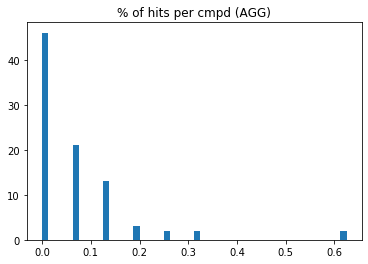

In [140]:
graph = []
for key in range(len(rev_cmpdIdx)):
    cmpd = rev_cmpdIdx[key]
    pos = data[data.exSMILE == cmpd]['agg'].value_counts().get(1)
    if pos:
        graph.append(pos/len(data[data.exSMILE == cmpd]['agg']))
    else:
        graph.append(0)
plt.hist(graph, bins=50)
plt.title('% of hits per cmpd (AGG)')

Text(0.5, 1.0, 'PCA for cmpds; blue has 0 hits (AGG)')

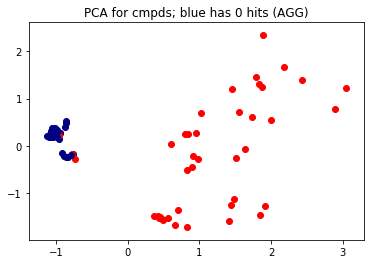

In [139]:
X = PCA(n_components=2).fit(target).transform(target)
for i in range(len(rev_cmpdIdx)):
    plt.scatter(X[i][0], X[i][1], color = 'navy' if graph[i] == 0 else 'red')
plt.title('PCA for cmpds; blue has 0 hits (AGG)')

Text(0.5, 1.0, '% of hits per drug (AGG)')

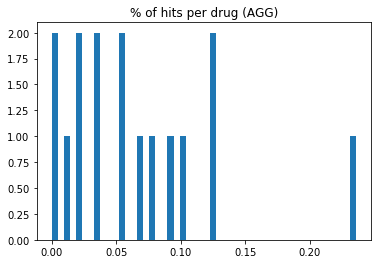

In [146]:
graph = []
for key in range(len(rev_drugIdx)):
    drug = rev_drugIdx[key]
    pos = data[data.drugSMILE == drug]['agg'].value_counts().get(1)
    if pos:
        graph.append(pos/len(data[data.drugSMILE == drug]['agg']))
    else:
        graph.append(0)
plt.hist(graph, bins=50)
plt.title('% of hits per drug (AGG)')

Text(0.5, 1.0, 'PCA for drug; # increasing hits from blue, red, green (AGG)')

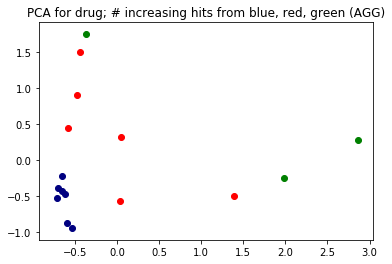

In [150]:
drug_target = embed.state_dict()['drug.weight']
colors = ['navy', 'red', 'green']

X = PCA(n_components=2).fit(drug_target).transform(drug_target)
for i in range(len(rev_drugIdx)):
    if graph[i] < 0.05:
        col = 0
    elif graph[i] < 0.11:
        col = 1
    else:
        col = 2
    plt.scatter(X[i][0], X[i][1], color = colors[col])
plt.title('PCA for drug; # increasing hits from blue, red, green (AGG)')

### Anti

Text(0.5, 1.0, '% of hits per cmpd (AGG)')

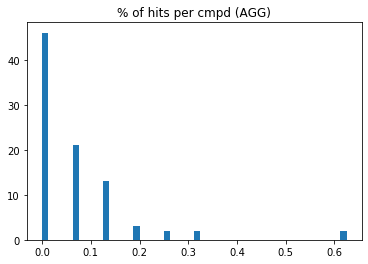

In [288]:
graph = []
for key in range(len(rev_cmpdIdx)):
    cmpd = rev_cmpdIdx[key]
    pos = data[data.exSMILE == cmpd]['agg'].value_counts().get(1)
    if pos:
        graph.append(pos/len(data[data.exSMILE == cmpd]['agg']))
    else:
        graph.append(0)
plt.hist(graph, bins=50)
plt.title('% of hits per cmpd (AGG)')

In [295]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'PCA for cmpds; blue has 0 hits (AGG)')

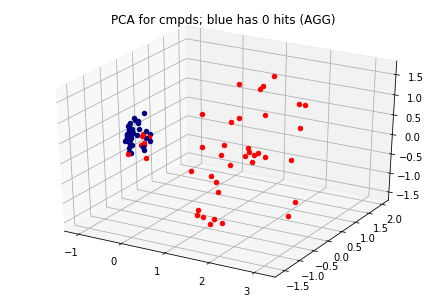

In [298]:
X = PCA(n_components=3).fit(target).transform(target)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(len(rev_cmpdIdx)):
    ax.scatter(X[i][0], X[i][1], X[i][2], color = 'navy' if graph[i] == 0 else 'red')
plt.title('PCA for cmpds; blue has 0 hits (AGG)')

Text(0.5, 1.0, 'PCA for cmpds; blue has 0 hits (AGG)')

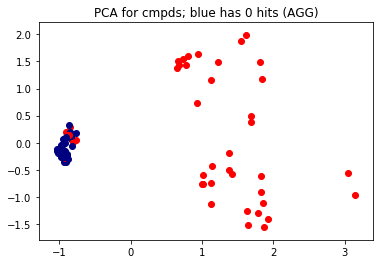

In [299]:
X = PCA(n_components=2).fit(target).transform(target)
for i in range(len(rev_cmpdIdx)):
    plt.scatter(X[i][0], X[i][1], color = 'navy' if graph[i] == 0 else 'red')
plt.title('PCA for cmpds; blue has 0 hits (AGG)')

Text(0.5, 1.0, '% of hits per drug (AGG)')

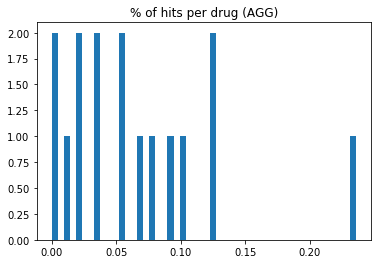

In [283]:
graph = []
for key in range(len(rev_drugIdx)):
    drug = rev_drugIdx[key]
    pos = data[data.drugSMILE == drug]['agg'].value_counts().get(1)
    if pos:
        graph.append(pos/len(data[data.drugSMILE == drug]['agg']))
    else:
        graph.append(0)
plt.hist(graph, bins=50)
plt.title('% of hits per drug (AGG)')

Text(0.5, 1.0, 'PCA for drug; # increasing hits from blue, red, green (AGG)')

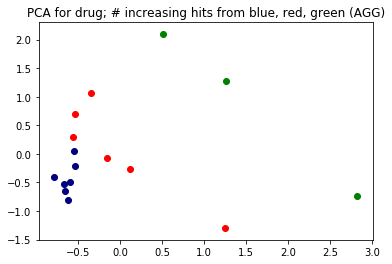

In [284]:
drug_target = embed.state_dict()['drug.weight']
colors = ['navy', 'red', 'green']

X = PCA(n_components=2).fit(drug_target).transform(drug_target)
for i in range(len(rev_drugIdx)):
    if graph[i] < 0.05:
        col = 0
    elif graph[i] < 0.11:
        col = 1
    else:
        col = 2
    plt.scatter(X[i][0], X[i][1], color = colors[col])
plt.title('PCA for drug; # increasing hits from blue, red, green (AGG)')